In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def constant_bet_red(
    x: float,
    fixed_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    seqns = []
    prob = x / 100

    for iteration in range(num_simulations):
        bankroll = initial_bankroll
        seq = [bankroll, ]
        for round in range(num_rounds):
            if random.random() <= prob:
                bankroll += fixed_bet
            else:
                bankroll -= fixed_bet
            seq.append(bankroll)
            if bankroll <= 0:
                ruin += 1
                for _ in range(num_rounds - round - 1):
                    seq.append(0)
                break
        else:
            ret += bankroll
        seqns.append(seq)

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin, seqns

In [3]:
def doubling_bet_red(
    x: float,
    initial_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    seqns = []
    prob = x / 100

    for iteration in range(num_simulations):
        next_bet = initial_bet
        bankroll = initial_bankroll
        seq = [bankroll, ]
        for round in range(num_rounds):
            if random.random() <= prob:
                bankroll += next_bet
                next_bet = initial_bet
            else:
                bankroll -= next_bet
                next_bet = min(bankroll, 2 * next_bet)
            seq.append(bankroll)
            if bankroll <= 0:
                ruin += 1
                for _ in range(num_rounds - round - 1):
                    seq.append(0)
                break
        else:
            ret += bankroll
        seqns.append(seq)

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin, seqns

In [4]:
def constant_bet_green(
    x: float,
    fixed_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    seqns = []
    prob = 1 - 2 * x / 100

    for iteration in range(num_simulations):
        bankroll = initial_bankroll
        seq = [bankroll, ]
        for round in range(num_rounds):
            if random.random() <= prob:
                bankroll += 17 * fixed_bet
            else:
                bankroll -= fixed_bet
            seq.append(bankroll)
            if bankroll <= 0:
                ruin += 1
                for _ in range(num_rounds - round - 1):
                    seq.append(0)
                break
        else:
            ret += bankroll
        seqns.append(seq)

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin, seqns

In [5]:
def random_bet(
    x: float,
    fixed_bet: float = 10,
    initial_bankroll: float = 1000,
    num_rounds: float = 1000,
    num_simulations: float = 1000
) -> (float, float):

    if not 0 < x < 50:
        raise ValueError('Invalid set of probabilities.')

    ret = 0
    ruin = 0
    seqns = []
    colors = ['red', 'black', 'green']

    for iteration in range(num_simulations):
        bankroll = initial_bankroll
        seq = [bankroll, ]
        for round in range(num_rounds):
            color = random.choice(colors)
            if color == 'red' or color == 'black':
                prob = x / 100
                payout_factor = 1
            else:
                prob = 1 - 2 * x / 100
                payout_factor = 17
            u = random.random()
            if u <= prob:
                bankroll += payout_factor * fixed_bet
            else:
                bankroll -= fixed_bet
            seq.append(bankroll)
            if bankroll <= 0:
                ruin += 1
                for _ in range(num_rounds - round - 1):
                    seq.append(0)
                break
        else:
            ret += bankroll
        seqns.append(seq)

    ret /= num_simulations
    ruin /= num_simulations

    return ret, ruin, seqns

In [6]:
x_vals = []
strategies = [
    constant_bet_red,
    doubling_bet_red,
    constant_bet_green,
    random_bet
]
colors = ['y', 'r', 'g', 'm']
returns = [
    [] for _ in strategies
]
ruins = [
    [] for _ in strategies
]
seqns = [
    [] for _ in strategies
]

In [7]:
gran = 1
for i in range(1, 50 * gran):
    x = i // gran
    x_vals.append(x)
    print(x, end=' ')
    for j, strategy in enumerate(strategies):
        ret, ruin, seq = strategy(x)
        returns[j].append(ret)
        ruins[j].append(ruin)
        seqns[j].append(seq)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

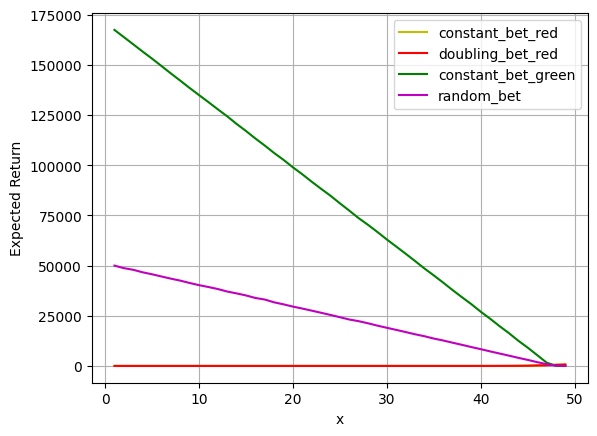

In [8]:
for i, strategy in enumerate(strategies):
    plt.plot(x_vals, returns[i], label=strategy.__name__, color=colors[i])
plt.xlabel("x")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
plt.show()

### Analysis of Expected Return

1. Constant bet on green yields the highest return, in expectation. This can be attributed to higher payoff of 18 times per bet, for winning on green, in stark constant to a payoff of 2 times, for red/black.

2. Random bet yields the second highest, due to a decent probability of betting on green, which has better payoff, as noted above.

3. Constant bet and doubling bet on red/black yield no return, in expectation, for x in range (0, 40).

4. Doubling bet on red/black tends to yield better, in expectation, than constant bet on red/black, for x in range (40,45).

5. Constant bet on red/black tends to yield better, in expectation, than doubling bet on red/black, for x in range (45,50).

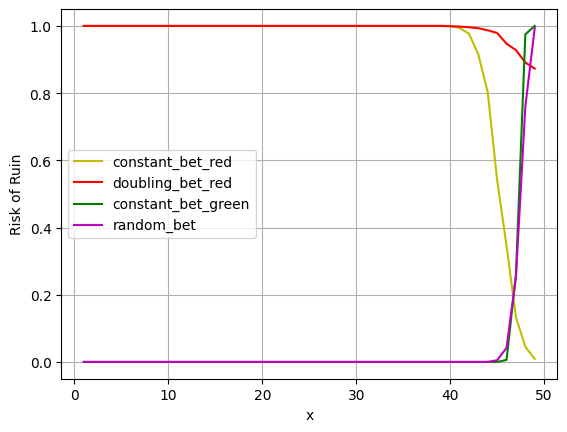

In [9]:
for i, strategy in enumerate(strategies):
    plt.plot(x_vals, ruins[i], label=strategy.__name__, color=colors[i])
plt.xlabel("x")
plt.ylabel("Risk of Ruin")
plt.grid(True)
plt.legend()
plt.show()

### Analysis of Risk of Ruin

1. Constant bet on green and random bet have a near zero risk of ruin in the range (0, 45).

2. Constant bet on green has a slighly better (lower) risk of ruin in the range (46, 47).

3. Random bet has a better risk or ruin in the range (47, 50). This can be attributed to reduction in the number of bets on green, which has a very low probability of winning, i.e. in the range (0, 6).

4. Constant and doubling bet on red/black have a very high risk of ruin in the range (0, 42).

5. Risk reduces rapidly in the case of constant bet on red/black, as the probability of winning on red/black increases. This approaches zero, as the difference between probability of winning and losing decreases.

6. Risk reduces slightly, in the case of doubling bet on red/black. The risk that still remains can be attributed to the fact that a sequence of around 7 losses (10 + 20 + 40 ... + 640 = 1270 > 1000) can easily lead the player to ruin. The gains on the other hand contribute a feeble $10 every win, if the amount spent in recovery were to be ignored.

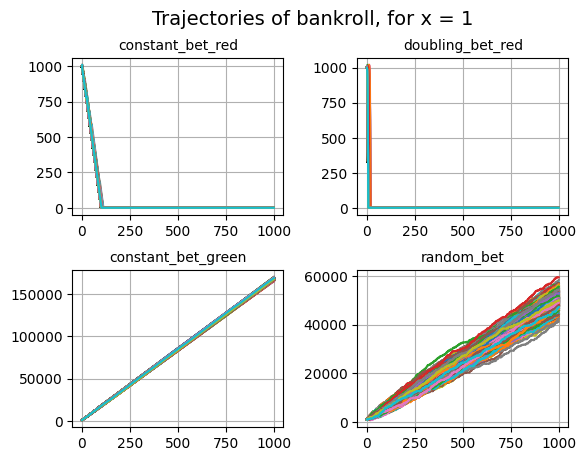

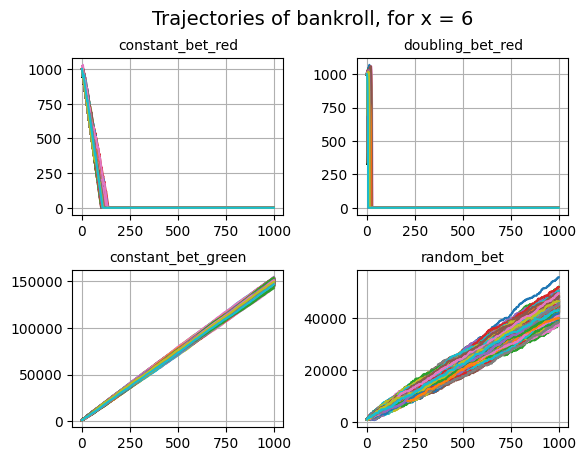

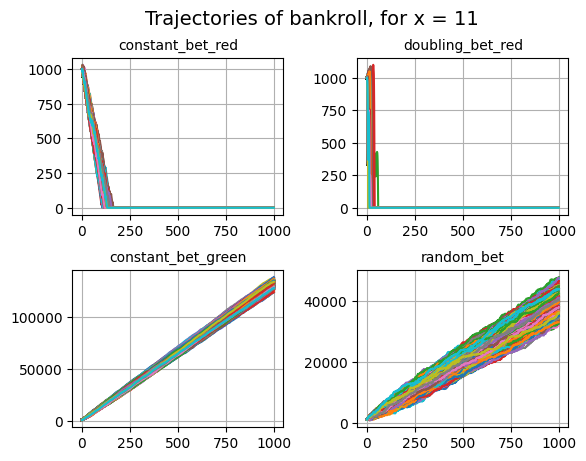

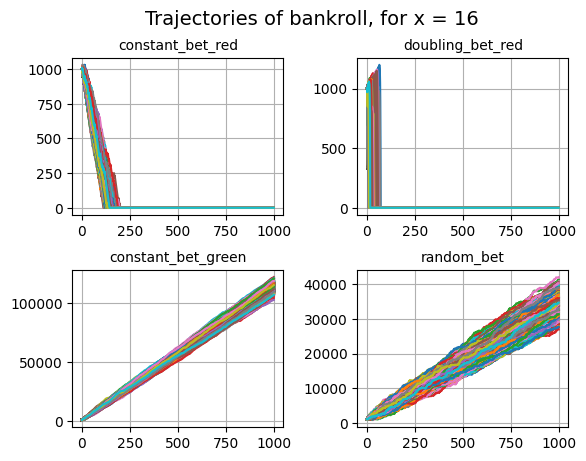

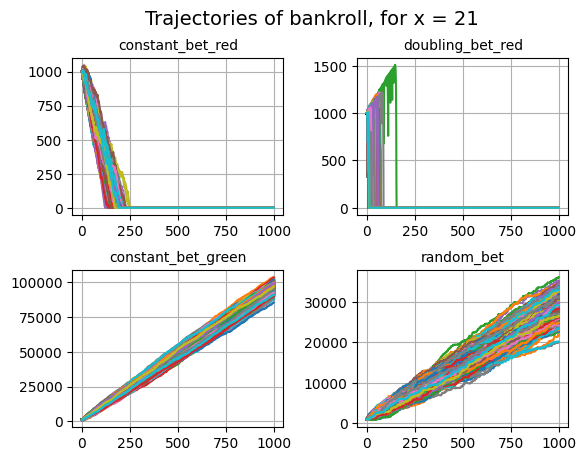

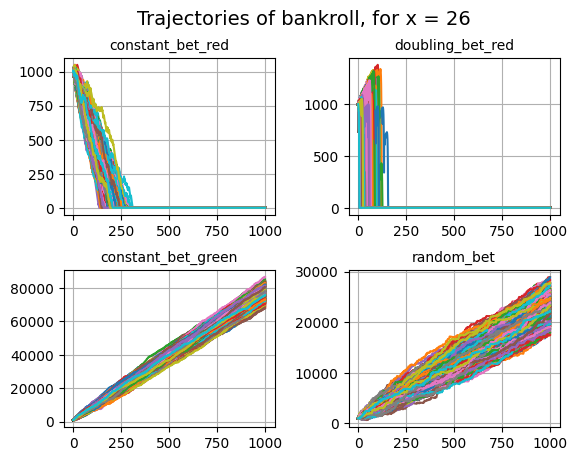

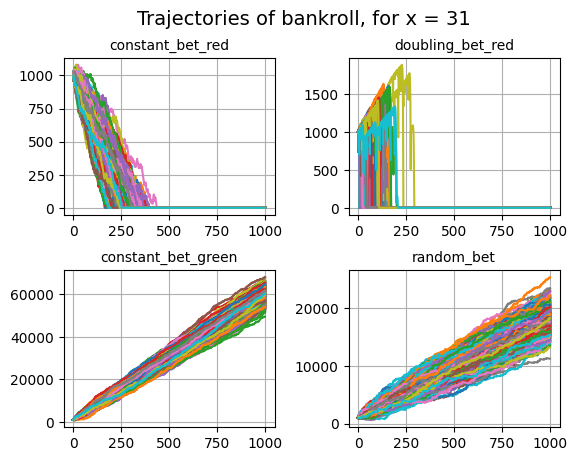

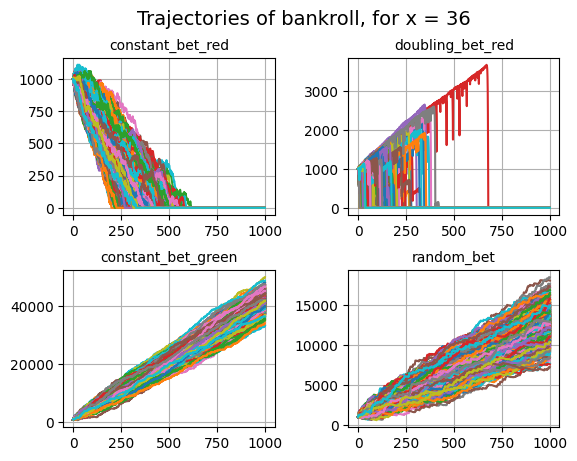

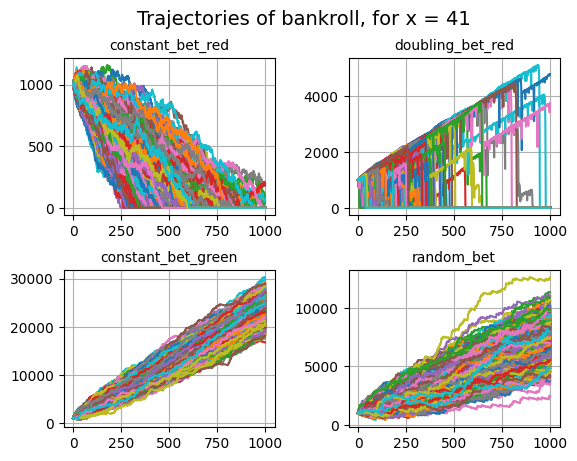

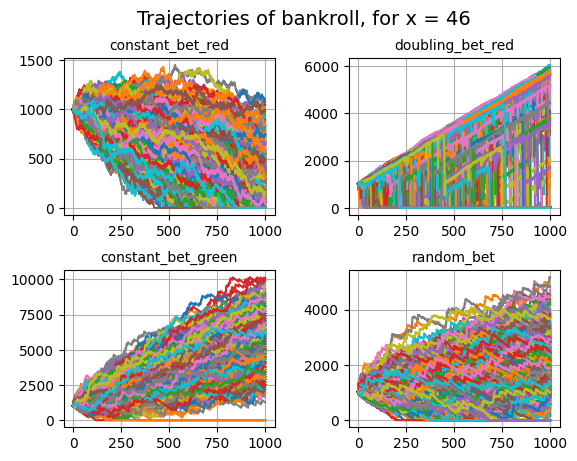

In [12]:
for i in range(0, len(seqns[0]), 5):
    fig, ax = plt.subplots(2, 2)
    for j, strategy in enumerate(strategies):
        r = j // 2
        c = j % 2
        for k in range(len(seqns[j][i])):
            ax[r, c].plot(range(len(seqns[j][i][k])), seqns[j][i][k])
        ax[r, c].set_title(strategy.__name__, fontsize=10)
        ax[r, c].grid(True)
    fig.suptitle('Trajectories of bankroll, for x = ' + str(x_vals[i]), fontsize=14)
    plt.subplots_adjust(hspace=0.35, wspace=0.35)
plt.show()

### Conclusion

1. Constant bet on green is the preferred strategy in the range (0, 47), followed by random bet, constant bet on red/black, and doubling bet on red/black (in that order). The risk of ruin involved in doubling bet on red/black, outweighs the marginal gains it has over constant bet on red/black, in this range.

2. Constant bet on red/black is the preferred strategy in the range (47, 50), followed by doubling bet on red/black, random bet, and constant bet on green.

3. There is a small range in (47, 48), where doubling bet on red/black and random bet have approximately equal returns, with random bet involving lesser risk. In that case, the latter could be preferred more.